# Comparison between activation functions
---
Author : Jea Kwon  
Group : Escaper's study  
Date: 2019-07-24  


In 2017, Google reported new activation function, **Swish**. 
![Swish](https://miro.medium.com/max/788/1*6tUAKb3_1uGybwSufey3ZA.tiff)  
[Comparison of activation functions](https://medium.com/@jaiyamsharma/experiments-with-swish-activation-function-on-mnist-dataset-fc89a8c79ff7)

![Swish with Beta](https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-3-030-19501-4_49/MediaObjects/481228_1_En_49_Fig2_HTML.png)

# Model scaffold

with keras backend of tensorflow library, analyze function returns loss and accuracy with specific dataset and activation function.

## analyze(dataset, activation, epochs=3, n_hidden_layers=2, n_hidden_neurons=128, optimizer='adam',             loss='sparse_categorical_crossentropy', metrics=['accuracy'], verbose=0)

### Input
**dataset**: sample dataset provided by library  
**activation**: activation function which is runnable inside the keras layer  
**epoch**: number of epochs, (default)= 3  
**n_hidden_layer**: number of hidden Dense layers, (default)= 2  
**n_hidden_neurons**: number of hidden neurons per layers, (default)=128  
**optimizer** : (default)='adam'  
**loss**: (default)='sparse_categorical_crossentropy'  
**metrics**: (default )=['accuracy']  
**verbos**: Epoch learning print option, (default)=0 (disabled)


### Output
**loss**: model loss evaluated with testset  
**acc**: model accuracy evaluated with testset

In [0]:
import tensorflow as tf

def analyze(dataset, activation, epochs=3, n_hidden_layers=2, 
            n_hidden_neurons=128, optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'], verbose=0):
  (x_train, y_train), (x_test, y_test) = dataset.load_data()
  x_train = tf.keras.utils.normalize(x_train, axis=1)
  x_test = tf.keras.utils.normalize(x_test, axis=1)
  
  input_shape = x_train[0].shape
  
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=input_shape))
  for _ in range(n_hidden_layers):
    model.add(tf.keras.layers.Dense(n_hidden_neurons, activation=activation))
  model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
  model.fit(x_train, y_train, epochs=epochs, verbose=verbose)
  loss, acc = model.evaluate(x_test, y_test, verbose=verbose)
  return loss, acc

# Summarize n-times running of analyze function
summarize total loss and acc as pd.DataFrame from n-times running of analyze()

## summarize(ntimes, dataset, activation, **kwargs)

### Input
**ntimes**: same models will be analyzed n-times by setting this value, (default)=5  
**dataset**: sample dataset provided by library  
**activation**: activation function which is runnable inside the keras layer  
**kwargs**: keyword arguments anything inside analyze function will be effective

### Output
**df**: pd.DataFrame, columns=['loss, acc'], index=range(ntimes). 

In [0]:
import pandas as pd

def summarize(ntimes, dataset, activation, **kwargs):
  df = pd.DataFrame(columns=['loss', 'acc'])
  for i in range(ntimes):
    loss, acc = analyze(dataset, activation, **kwargs)
    df.loc[i,'loss'] = loss
    df.loc[i,'acc'] = acc
  return df

# Total summary of activation functions. (with plot option)

## main(activation_functions, dataset, plot=False, **kwargs)

### Input
**activation_functions**: dict of activtion_functions  
**dataset**: sample dataset provided by library  
**plot**: bool, (default)=True. if False, seaborn stripplot of loss, acc is disabled  
**kwargs**: keyword arguments anything inside analyze function will be effective

### Output
**df**: dict, key=['loss', 'acc']/, value=pd.DataFrame(columns=['..activation_function_names..''])

## summary_plot(summary)

### Input
**summary**: summary output from main()

### Output
**None**: showing inline loss and acc plots of summary

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

def main(activation_functions, dataset, ntimes=5, plot=True, **kwargs):
  summary = {}
  print(f"""Analysis start
  Activation functions: {activation_functions.keys()}
  Dataset:{dataset.__name__}""")
  for i, (name, activation) in enumerate(activation_functions.items(), start=1):
    summary[name] = summarize(ntimes, dataset, activation, **kwargs)
    print(f'[{i}/{len(activation_functions)}][{name} analysis completed]')
  if plot:
    summary_plot(summary)
  return summary

def summary_plot(summary):
  df_loss = pd.DataFrame()
  df_acc = pd.DataFrame()
  for name, df in summary.items():
    df_loss[name] = df['loss']
    df_acc[name] = df['acc']
  plt.figure(1)
  plt.title(f'loss')
  sns.stripplot(data=df_loss, alpha=0.7)
  plt.figure(2)
  plt.title('acc')
  sns.stripplot(data=df_acc, alpha=0.7)

# Usage example

1. Listup your activation functions
2. Assign keras dataset

In [0]:
activation_functions = dict(
    tanh = tf.nn.tanh,
    sigmoid = tf.nn.sigmoid,
    relu = tf.nn.relu,
    leaky_relu = tf.nn.leaky_relu,
    swish = tf.nn.swish,
)
dataset = tf.keras.datasets.mnist

3. run main function with your options

Analysis start
  Activation functions: dict_keys(['tanh', 'sigmoid', 'relu', 'leaky_relu', 'swish'])
  Dataset:tensorflow.python.keras.api._v1.keras.datasets.mnist


W0724 08:32:24.770990 139976172828544 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


[1/5][tanh analysis completed]
[2/5][sigmoid analysis completed]
[3/5][relu analysis completed]
[4/5][leaky_relu analysis completed]
[5/5][swish analysis completed]


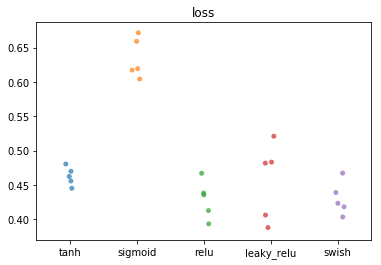

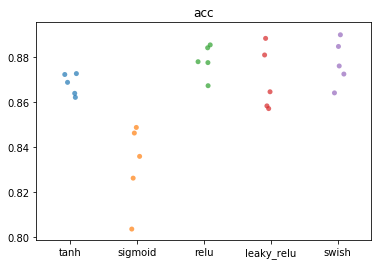

In [0]:
mnist_ntimes5_epoch3_layer1_neuron5 = main(activation_functions, dataset, 
                                    ntimes=5, epochs=3, n_hidden_layers=1, n_hidden_neurons=5)

Analysis start
  Activation functions: dict_keys(['tanh', 'sigmoid', 'relu', 'leaky_relu', 'swish'])
  Dataset:tensorflow.python.keras.api._v1.keras.datasets.mnist
Epoch 1/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.3681 - acc: 0.8912
Epoch 2/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.2233 - acc: 0.9354
Epoch 3/10
60000/60000 [==============================] - 11s 182us/sample - loss: 0.1807 - acc: 0.9483
Epoch 4/10
60000/60000 [==============================] - 11s 176us/sample - loss: 0.1509 - acc: 0.9574
Epoch 5/10
60000/60000 [==============================] - 11s 176us/sample - loss: 0.1351 - acc: 0.9614
Epoch 6/10
60000/60000 [==============================] - 11s 185us/sample - loss: 0.1206 - acc: 0.9658
Epoch 7/10
60000/60000 [==============================] - 11s 178us/sample - loss: 0.1080 - acc: 0.9704
Epoch 8/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.0972 - acc: 0.9730
Epoc

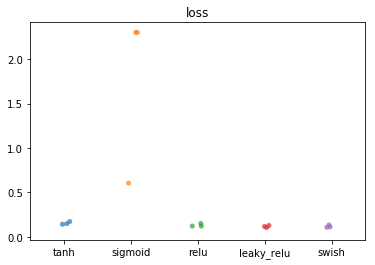

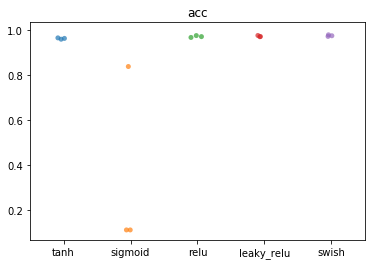

In [0]:
activation_functions = dict(
    tanh = tf.nn.tanh,
    sigmoid = tf.nn.sigmoid,
    relu = tf.nn.relu,
    leaky_relu = tf.nn.leaky_relu,
    swish = tf.nn.swish,
)
dataset = tf.keras.datasets.mnist

mnist_ntimes3_epoch10_layer10_neuron100 = main(activation_functions, dataset, 
                                    ntimes=3, epochs=10, n_hidden_layers=10, n_hidden_neurons=100, verbose=1)

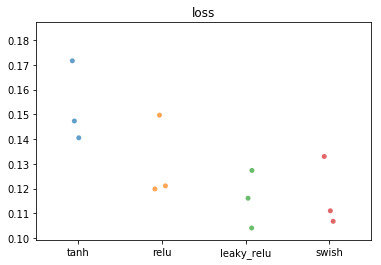

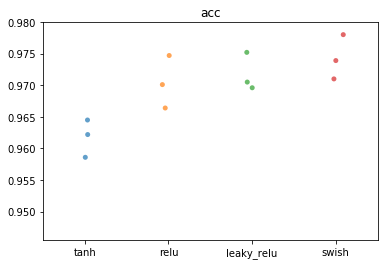

In [0]:
summary_plot(mnist_ntimes3_epoch10_layer10_neuron100)

Analysis start
  Activation functions: dict_keys(['tanh', 'sigmoid', 'relu', 'leaky_relu', 'swish'])
  Dataset:tensorflow.python.keras.api._v1.keras.datasets.cifar10
[1/5][tanh analysis completed]
[2/5][sigmoid analysis completed]
[3/5][relu analysis completed]
[4/5][leaky_relu analysis completed]
[5/5][swish analysis completed]


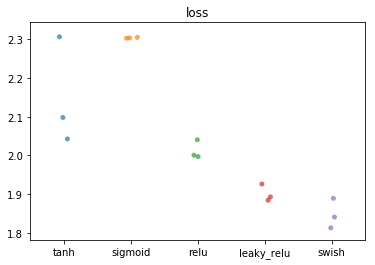

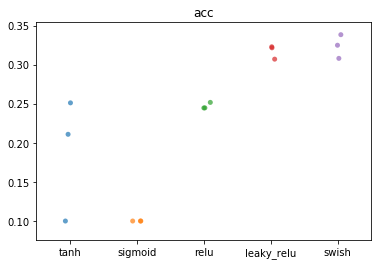

In [0]:
activation_functions = dict(
    tanh = tf.nn.tanh,
    sigmoid = tf.nn.sigmoid,
    relu = tf.nn.relu,
    leaky_relu = tf.nn.leaky_relu,
    swish = tf.nn.swish,
)
dataset = tf.keras.datasets.cifar10

cifar10_ntimes3_epoch10_layer10_neuron100 = main(activation_functions, dataset, 
                                    ntimes=3, epochs=3, n_hidden_layers=10, n_hidden_neurons=100)